In [1]:
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

This tutorial was done using [Unfold Data Science's Video](https://www.youtube.com/watch?v=HpKMc78OYts)

[Link to data](https://www.kaggle.com/anu0012/hotel-review)

### Loading dataset 

In [2]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


<IPython.core.display.Javascript object>

### EDA 

In [3]:
df.shape

(38932, 5)

<IPython.core.display.Javascript object>

The aim is to predict the target column (Is_Response) using the Description column. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


<IPython.core.display.Javascript object>

In [5]:
df.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id20835,1
Description,38932,38932,At first glance the hotel did not impress me t...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


<IPython.core.display.Javascript object>

In [6]:
# checking for missing values and printing the percentage of missing values in each column

count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum() / len(df) * 100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=["Count", "Percentage"])

<IPython.core.display.Javascript object>

In [7]:
missing_data

,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


<IPython.core.display.Javascript object>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

Percentage distribution of target column:
happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


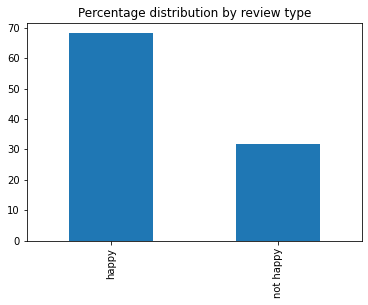

<IPython.core.display.Javascript object>

In [9]:
print("Percentage distribution of target column:")
print(round(df.Is_Response.value_counts(normalize=True) * 100, 2))
round(df.Is_Response.value_counts(normalize=True) * 100, 2).plot(kind="bar")
plt.title("Percentage distribution by review type")
plt.show()

In [10]:
# dropping unwanted columns

columns = ["User_ID", "Browser_Used", "Device_Used"]
df.drop(columns, inplace=True, axis=1)
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


<IPython.core.display.Javascript object>

### Cleaning text data

In [11]:
import re
import string

<IPython.core.display.Javascript object>

In [12]:
# defining a function to convert to lower-case, removing special characters, numbers and punctuation


def text_clean_1(text):
    text = text.lower()
    text = re.sub("\[.*?\]", "", text)  # removes square brackets
    text = re.sub(
        "[%s]" % re.escape(string.punctuation), "", text
    )  # removes punctuation
    text = re.sub("\w*\d\w*", "", text)  # removes digits
    return text


cleaned1 = lambda x: text_clean_1(x)

<IPython.core.display.Javascript object>

In [13]:
df["cleaned_description"] = pd.DataFrame(df.Description.apply(cleaned1))
df.head()

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


<IPython.core.display.Javascript object>

In [14]:
# applying a second line of cleaning to remove quotes and new line characters


def text_clean_2(text):
    text = re.sub("[" '""...]', "", text)
    text = re.sub("\n", "", text)
    return text


cleaned2 = lambda x: text_clean_2(x)

<IPython.core.display.Javascript object>

In [15]:
df["cleaned_description_new"] = df.cleaned_description.apply(cleaned2)
df.head()

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...


<IPython.core.display.Javascript object>

### Model Training 

In [16]:
from sklearn.model_selection import train_test_split

X = df.cleaned_description_new
y = df.Is_Response

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (35038,)
Shape of X_test (3894,)
Shape of y_train (35038,)
Shape of y_test (3894,)


<IPython.core.display.Javascript object>

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

<IPython.core.display.Javascript object>

In [18]:
tvec = TfidfVectorizer()
logreg = LogisticRegression()

<IPython.core.display.Javascript object>

In [19]:
model = Pipeline([("Vectorizer", tvec), ("Classifier", logreg)])

model.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Classifier', LogisticRegression())])

<IPython.core.display.Javascript object>

### Evaluating model metrics 

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(X_test)
print(confusion_matrix(y_pred, y_test))

[[2483  280]
 [ 166  965]]


<IPython.core.display.Javascript object>

The model was able to correctly predict 88.5% of the values in y_test.

In [25]:
print("The model accuracy is:", round(accuracy_score(y_pred, y_test), 2))
print(
    "The model precision is:",
    round(precision_score(y_pred, y_test, average="weighted"), 2),
)
print(
    "The model recall is:", round(recall_score(y_pred, y_test, average="weighted"), 2)
)

The model accuracy is: 0.89
The model precision is: 0.89
The model recall is: 0.89


<IPython.core.display.Javascript object>

### Predicting on new reviews 

In [26]:
review_1 = "I am delighted."
review_1 = [review_1]
result = model.predict(review_1)

print(result)

['happy']


<IPython.core.display.Javascript object>

In [27]:
review_2 = "I am angry."
review_2 = [review_2]
result = model.predict(review_2)

print(result)

['not happy']


<IPython.core.display.Javascript object>